# KAGGLE - NBA

Import all libraries necessary for my project:

In [1256]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np

import pandas as pd

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import datasets
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score,
    roc_curve, roc_auc_score, auc,
    confusion_matrix, ConfusionMatrixDisplay,
    precision_recall_curve, f1_score, average_precision_score,
    classification_report
)
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.model_selection import learning_curve
from sklearn.model_selection import StratifiedShuffleSplit
# models simples
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
# models ensemble
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier

# Other imports
import time
import random
from scipy import stats
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

Loading the dataset:

In [1257]:
nba = pd.read_csv('all_seasons.csv')
nba.head()

,Unnamed: 0,player_name,team_abbreviation,age,player_height,player_weight,college,country,draft_year,draft_round,...,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct,season
0,0,Randy Livingston,HOU,22.0,193.04,94.800728,Louisiana State,USA,1996,2,...,3.9,1.5,2.4,0.3,0.042,0.071,0.169,0.487,0.248,1996-97
1,1,Gaylon Nickerson,WAS,28.0,190.50,86.182480,Northwestern Oklahoma,USA,1994,2,...,3.8,1.3,0.3,8.9,0.030,0.111,0.174,0.497,0.043,1996-97
2,2,George Lynch,VAN,26.0,203.20,103.418976,North Carolina,USA,1993,1,...,8.3,6.4,1.9,-8.2,0.106,0.185,0.175,0.512,0.125,1996-97
3,3,George McCloud,LAL,30.0,203.20,102.058200,Florida State,USA,1989,1,...,10.2,2.8,1.7,-2.7,0.027,0.111,0.206,0.527,0.125,1996-97
4,4,George Zidek,DEN,23.0,213.36,119.748288,UCLA,USA,1995,1,...,2.8,1.7,0.3,-14.1,0.102,0.169,0.195,0.500,0.064,1996-97


Lets see what type of Data we have for each column:

In [1258]:
t=nba.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12844 entries, 0 to 12843
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         12844 non-null  int64  
 1   player_name        12844 non-null  object 
 2   team_abbreviation  12844 non-null  object 
 3   age                12844 non-null  float64
 4   player_height      12844 non-null  float64
 5   player_weight      12844 non-null  float64
 6   college            10990 non-null  object 
 7   country            12844 non-null  object 
 8   draft_year         12844 non-null  object 
 9   draft_round        12844 non-null  object 
 10  draft_number       12844 non-null  object 
 11  gp                 12844 non-null  int64  
 12  pts                12844 non-null  float64
 13  reb                12844 non-null  float64
 14  ast                12844 non-null  float64
 15  net_rating         12844 non-null  float64
 16  oreb_pct           128

Now lets breakdown the dataset and see diferent properties of each column:

In [1259]:
d = nba.describe()
d

,Unnamed: 0,age,player_height,player_weight,gp,pts,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,ts_pct,ast_pct
count,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000,12844.000000
mean,6421.500000,27.045313,200.555097,100.263279,51.154158,8.212582,3.558486,1.824681,-2.226339,0.054073,0.140646,0.184641,0.513138,0.131595
std,3707.887763,4.339211,9.111090,12.426628,25.084904,6.016573,2.477885,1.800840,12.665124,0.043335,0.062513,0.053545,0.101724,0.094172
min,0.000000,18.000000,160.020000,60.327736,1.000000,0.000000,0.000000,0.000000,-250.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3210.750000,24.000000,193.040000,90.718400,31.000000,3.600000,1.800000,0.600000,-6.400000,0.021000,0.096000,0.149000,0.482000,0.066000
50%,6421.500000,26.000000,200.660000,99.790240,57.000000,6.700000,3.000000,1.200000,-1.300000,0.040000,0.130500,0.181000,0.525000,0.103000
75%,9632.250000,30.000000,208.280000,108.862080,73.000000,11.500000,4.700000,2.400000,3.200000,0.083000,0.179000,0.217000,0.563000,0.179000
max,12843.000000,44.000000,231.140000,163.293120,85.000000,36.100000,16.300000,11.700000,300.000000,1.000000,1.000000,1.000000,1.500000,1.000000


Lets see if we have any NaNs in our dataset. In this case we got any, but the code says otherwise. I analysed the column college and I realised that those that says NaN is because the players didn't go to college so the person that made the dataset put None in the spot.

In [1260]:
nan_count = nba.isnull().sum()
nan_percentage = nba.isnull().mean() * 100
print("Número de NaNs por columna:")
print(nan_count)
print("\nPorcentaje de NaNs por columna:")
print(nan_percentage)


Número de NaNs por columna:
Unnamed: 0              0
player_name             0
team_abbreviation       0
age                     0
player_height           0
player_weight           0
college              1854
country                 0
draft_year              0
draft_round             0
draft_number            0
gp                      0
pts                     0
reb                     0
ast                     0
net_rating              0
oreb_pct                0
dreb_pct                0
usg_pct                 0
ts_pct                  0
ast_pct                 0
season                  0
dtype: int64

Porcentaje de NaNs por columna:
Unnamed: 0            0.000000
player_name           0.000000
team_abbreviation     0.000000
age                   0.000000
player_height         0.000000
player_weight         0.000000
college              14.434756
country               0.000000
draft_year            0.000000
draft_round           0.000000
draft_number          0.000000
gp           

In [1261]:
nan_rows = nba[nba.isnull().any(axis=1)]
print("Rows with NaN values:")
print(nan_rows)

Rows with NaN values:
       Unnamed: 0        player_name team_abbreviation   age  player_height  \
6               6   Gheorghe Muresan               WAS  26.0         231.14   
72             72    Jermaine O'Neal               POR  18.0         210.82   
151           151         Dino Radja               BOS  30.0         210.82   
205           205         Shane Heal               MIN  26.0         182.88   
219           219    Sasha Danilovic               DAL  27.0         198.12   
...           ...                ...               ...   ...            ...   
12787       12787        Jaden Hardy               DAL  20.0         190.50   
12799       12799  Jonas Valanciunas               NOP  31.0         210.82   
12801       12801   Jonathan Kuminga               GSW  20.0         200.66   
12811       12811        Josh Giddey               OKC  20.0         203.20   
12837       12837         Joe Ingles               MIL  35.0         205.74   

       player_weight college 

#### Exploratory analysis and plots

Age distribution:

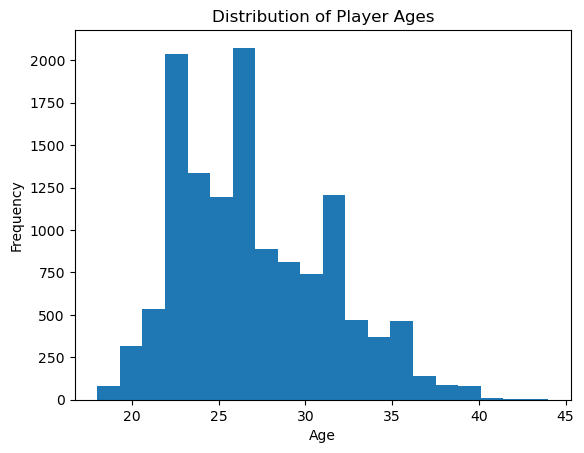

In [1262]:
plt.hist(nba['age'], bins=20)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Distribution of Player Ages')
plt.show()

Top scorer (max pts) of each season & top scorer of all time:

In [1263]:
top_scorers = nba.groupby('season')['pts'].max()
top_scorers = top_scorers.reset_index().merge(nba[['season', 'player_name', 'pts']], on=['season', 'pts'], how='left')

for season in top_scorers['season'].unique():
    season_top_scorer = top_scorers[top_scorers['season'] == season]
    print(f"Season {season}, Top Scorer: {season_top_scorer['player_name'].values[0]} - {season_top_scorer['pts'].values[0]} points")

# Group by player_name and calculate the sum of 'pts' for each player
player_total_points = nba.groupby('player_name')['pts'].sum()

# Find the player with the maximum total points
top_scorer = player_total_points.idxmax()
top_scorer_points = player_total_points.max()

print(f"All time Top Scorer: {top_scorer} - {top_scorer_points} points")

Season 1996-97, Top Scorer: Michael Jordan - 29.6 points
Season 1997-98, Top Scorer: Michael Jordan - 28.7 points
Season 1998-99, Top Scorer: Allen Iverson - 26.8 points
Season 1999-00, Top Scorer: Shaquille O'Neal - 29.7 points
Season 2000-01, Top Scorer: Allen Iverson - 31.1 points
Season 2001-02, Top Scorer: Allen Iverson - 31.4 points
Season 2002-03, Top Scorer: Tracy McGrady - 32.1 points
Season 2003-04, Top Scorer: Tracy McGrady - 28.0 points
Season 2004-05, Top Scorer: Allen Iverson - 30.7 points
Season 2005-06, Top Scorer: Kobe Bryant - 35.4 points
Season 2006-07, Top Scorer: Kobe Bryant - 31.6 points
Season 2007-08, Top Scorer: LeBron James - 30.0 points
Season 2008-09, Top Scorer: Dwyane Wade - 30.2 points
Season 2009-10, Top Scorer: Kevin Durant - 30.1 points
Season 2010-11, Top Scorer: Kevin Durant - 27.7 points
Season 2011-12, Top Scorer: Kevin Durant - 28.0 points
Season 2012-13, Top Scorer: Carmelo Anthony - 28.7 points
Season 2013-14, Top Scorer: Kevin Durant - 32.0 poi

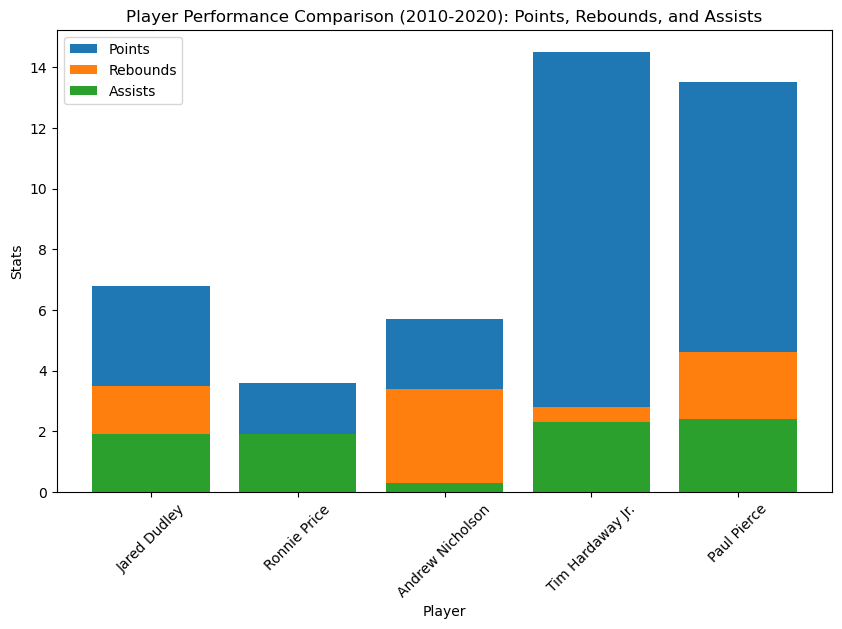

In [1264]:
def plot_five_player_performance(start_year, end_year):
    # Filter the data for the given year range
    filtered_data = nba[(nba['season'].str[0:4].astype(int) >= start_year) & (nba['season'].str[0:4].astype(int) < end_year)]
    
    # Sample 5 random players from the filtered data
    random_players = filtered_data.sample(5)
    
    # Plot the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(random_players['player_name'], random_players['pts'], label='Points')
    plt.bar(random_players['player_name'], random_players['reb'], label='Rebounds')
    plt.bar(random_players['player_name'], random_players['ast'], label='Assists')
    plt.xlabel('Player')
    plt.ylabel('Stats')
    plt.title(f'Player Performance Comparison ({start_year}-{end_year}): Points, Rebounds, and Assists')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Now you can call this function with any year range you want
plot_five_player_performance(2010, 2020)

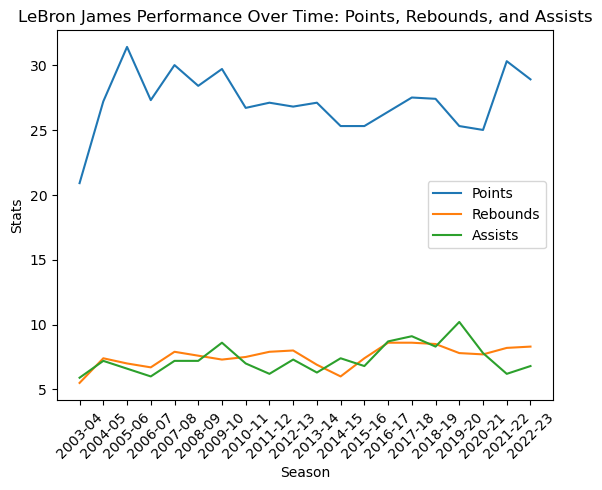

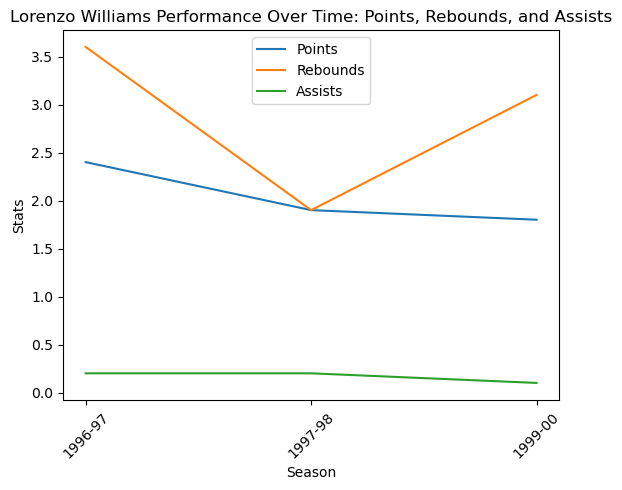

In [1265]:
def plot_player_performance(nba, player_name=None):
    # If no player_name is provided, select a random player
    if player_name is None:
        player_name = random.choice(nba['player_name'])
    
    # Filter the data for the given player
    player_data = nba[nba['player_name'] == player_name]
    
    # Plot the performance over time
    plt.plot(player_data['season'], player_data['pts'], label='Points')
    plt.plot(player_data['season'], player_data['reb'], label='Rebounds')
    plt.plot(player_data['season'], player_data['ast'], label='Assists')
    plt.xlabel('Season')
    plt.ylabel('Stats')
    plt.title(f'{player_name} Performance Over Time: Points, Rebounds, and Assists')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

# Now you can call this function with any player name you want
plot_player_performance(nba, 'LeBron James')

# Or call it without a player name to select a random player
plot_player_performance(nba)

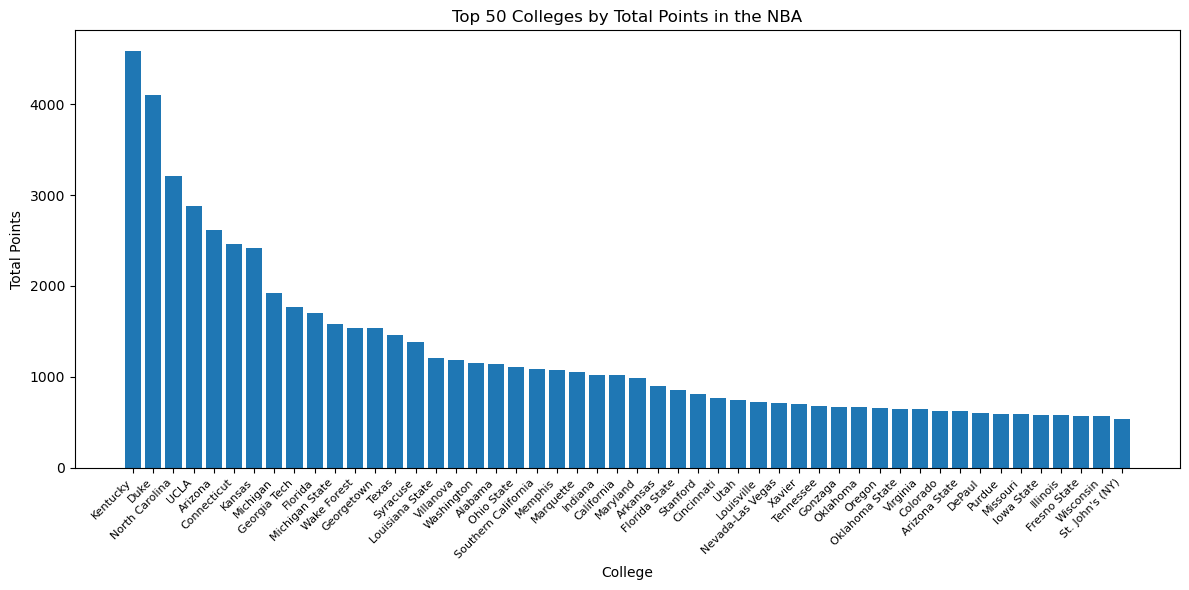

In [1266]:
college_points = nba.groupby('college')['pts'].sum().sort_values(ascending=False)
college_points = college_points.drop('None', errors='ignore')
top_colleges = college_points.head(50)
plt.figure(figsize=(12, 6))
plt.bar(top_colleges.index, top_colleges.values)
plt.xlabel('College')
plt.ylabel('Total Points')
plt.title('Top 50 Colleges by Total Points in the NBA')
plt.xticks(rotation=45, ha='right', fontsize=8)
plt.tight_layout()
plt.show()

### 2. Preprocessing

First thing we do is split the dataset using stratified:

In [1267]:
X = nba.drop('pts', axis=1)
y = nba['pts']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Encoding Categorical Variables & Feature Engineering:
The NBA has seen many phases of play styles and rules changes from 1996-97 to 2022-23. However, the exact division of these years into “big phases” can be subjective and depends on what aspects of the game you’re focusing on.

For simplicity, let’s divide the years into four phases based on some notable events and trends:

1996-97 to 2003-04: This phase is often associated with the dominance of Shaquille O’Neal and Kobe Bryant, as well as the rise of international players like Dirk Nowitzki and Manu Ginobili.

2004-05 to 2011-12: This phase saw the implementation of new rules that encouraged more fluid, perimeter-oriented play. It’s also the era of the Big Three in Boston and Miami.

2012-13 to 2015-16: This phase is marked by the dominance of the Golden State Warriors and their three-point shooting, as well as LeBron James’s championships with the Miami Heat and Cleveland Cavaliers.

2016-17 to 2022-23: The most recent phase has seen a further emphasis on three-point shooting and positionless basketball, with teams like the Houston Rockets pushing these trends to the extreme.

In [1268]:
def preprocess_data(df_train, df_test):
    # Concatenate the train and test datasets
    df = pd.concat([df_train, df_test])

    df['went_college'] = df['college'].notna()
    df.drop(['player_name','team_abbreviation', 'college', 'country', 'draft_number', 'draft_year'],axis=1,inplace=True)
    df.drop(df.columns[0], axis=1, inplace=True)
    d_round = pd.get_dummies(df['draft_round'], prefix='round')
    df.drop(['draft_round'],axis=1,inplace=True)
    df = pd.concat([df,d_round],axis=1)

    def get_phase(season):
        year = int(season.split('-')[0])
        if year < 2004:
            return 'Phase 1'
        elif year < 2012:
            return 'Phase 2'
        elif year < 2016:
            return 'Phase 3'
        else:
            return 'Phase 4'

    df['era'] = df['season'].apply(get_phase)

    # Apply get_dummies to the 'phase' column
    phase = pd.get_dummies(df['era'])
    df.drop(['era'],axis=1,inplace=True)
    df.drop(['season'],axis=1,inplace=True)
    df = pd.concat([df,phase],axis=1)

    # Split the data back into train and test datasets
    df_train = df.iloc[:len(df_train)]
    df_test = df.iloc[len(df_train):]

    return df_train, df_test

X_train, X_test = preprocess_data(X_train, X_test)
X_train


,age,player_height,player_weight,gp,reb,ast,net_rating,oreb_pct,dreb_pct,usg_pct,...,round_3,round_4,round_6,round_7,round_8,round_Undrafted,Phase 1,Phase 2,Phase 3,Phase 4
3570,22.0,198.12,102.058200,68,1.8,0.5,-10.9,0.069,0.104,0.221,...,False,False,False,False,False,False,False,True,False,False
11539,28.0,195.58,97.522280,3,4.3,3.0,29.8,0.000,0.151,0.154,...,False,False,False,False,False,False,False,False,False,True
9567,28.0,210.82,115.665960,74,5.4,1.9,-0.7,0.092,0.182,0.161,...,False,False,False,False,False,False,False,False,False,True
10149,37.0,193.04,99.790240,72,4.0,4.2,-1.8,0.033,0.106,0.269,...,False,False,False,False,False,False,False,False,False,True
777,32.0,208.28,111.130040,76,8.1,2.3,-1.5,0.093,0.166,0.169,...,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11964,36.0,205.74,108.862080,69,7.7,3.4,9.3,0.054,0.201,0.147,...,False,False,False,False,False,False,False,False,False,True
5191,31.0,210.82,113.398000,77,8.7,1.7,-0.7,0.145,0.242,0.115,...,False,False,False,False,False,False,False,True,False,False
5390,28.0,200.66,96.161504,78,3.3,1.8,4.4,0.023,0.139,0.170,...,False,False,False,False,False,False,False,True,False,False
860,27.0,203.20,103.418976,82,4.4,1.5,-3.3,0.115,0.170,0.207,...,False,False,False,False,False,False,True,False,False,False


Lets see the outliers:

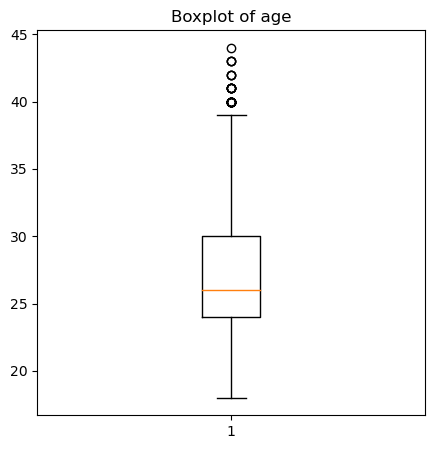

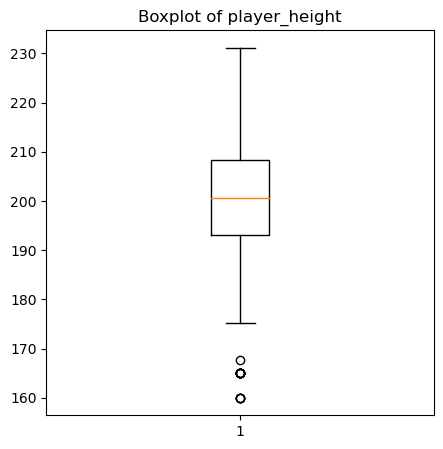

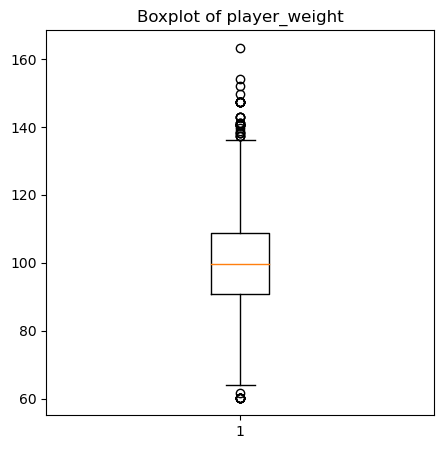

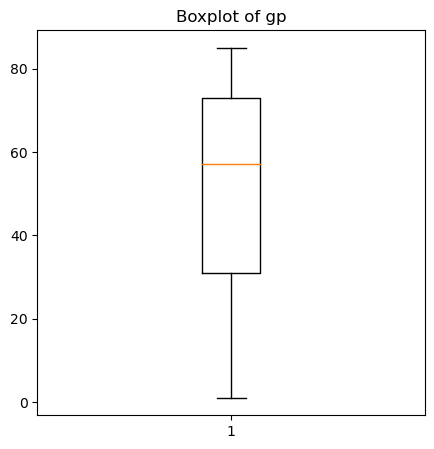

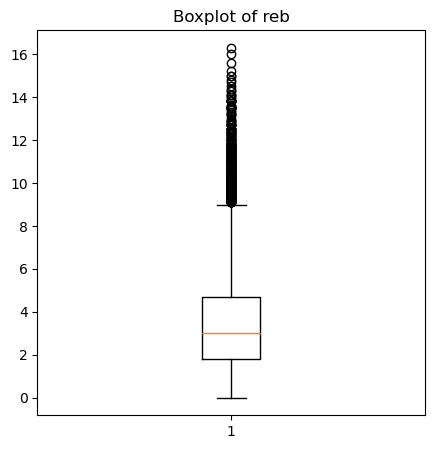

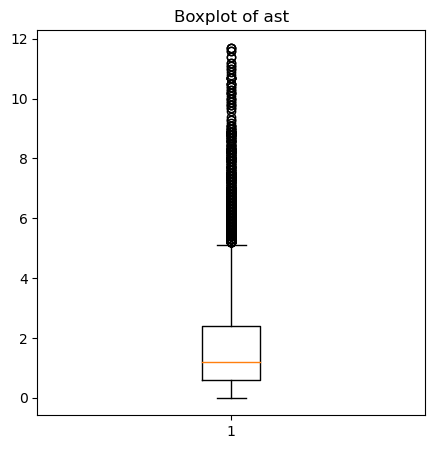

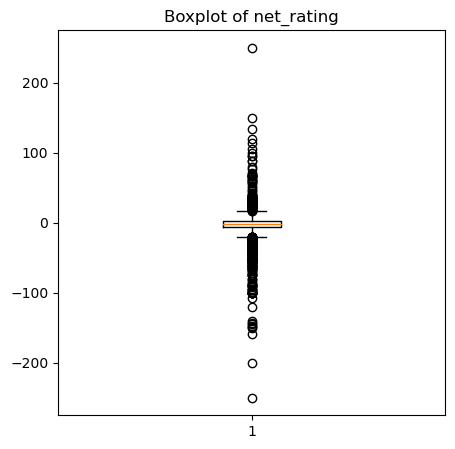

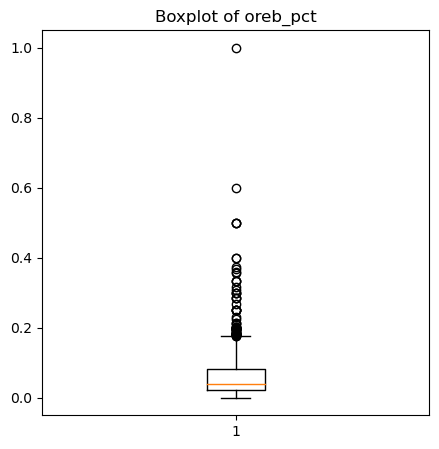

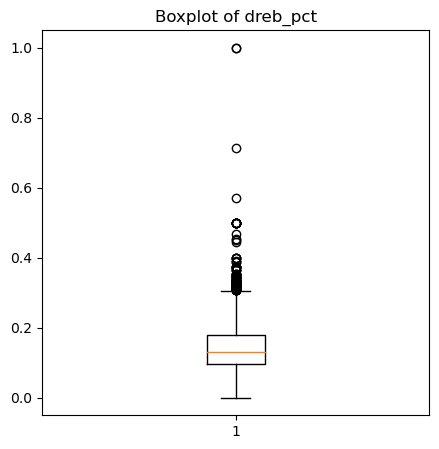

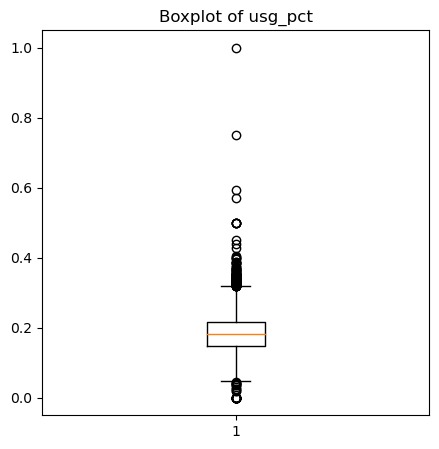

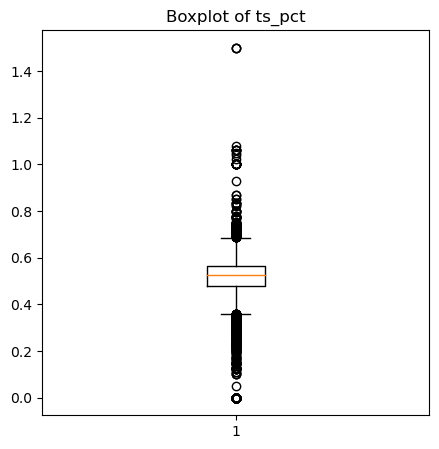

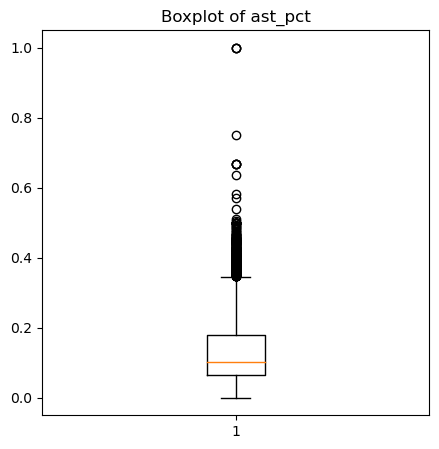

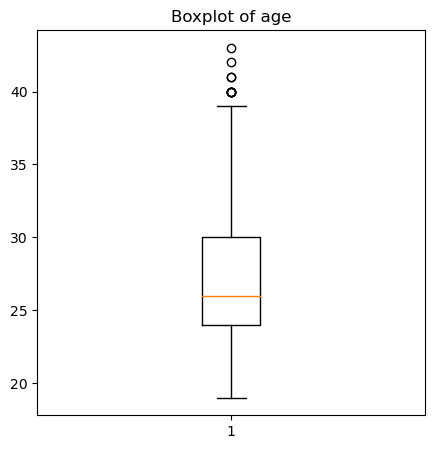

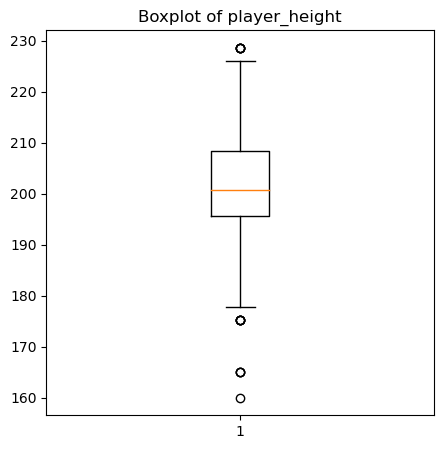

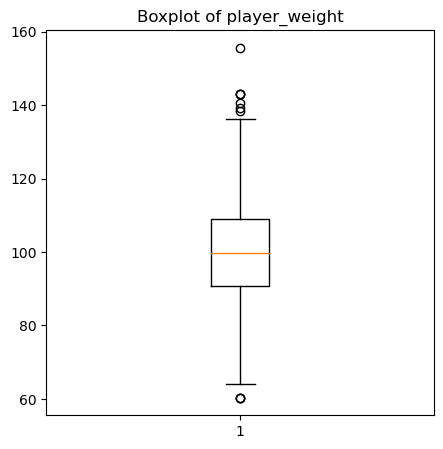

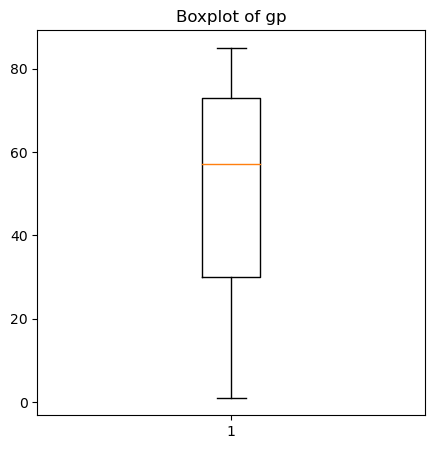

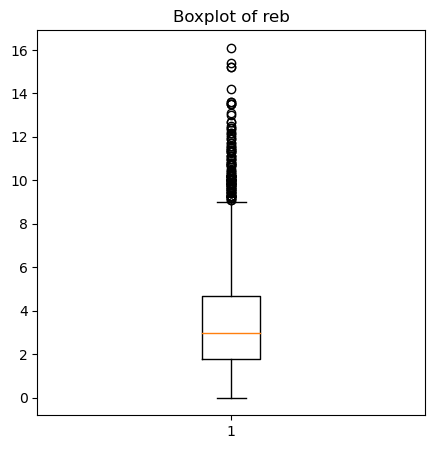

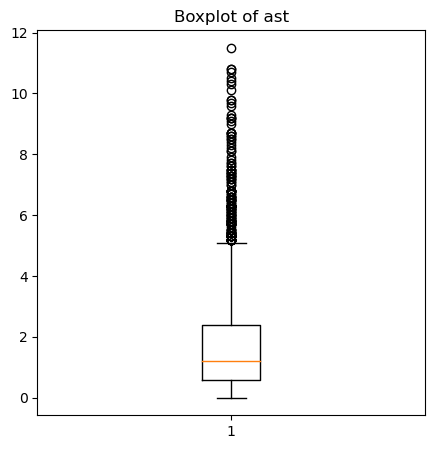

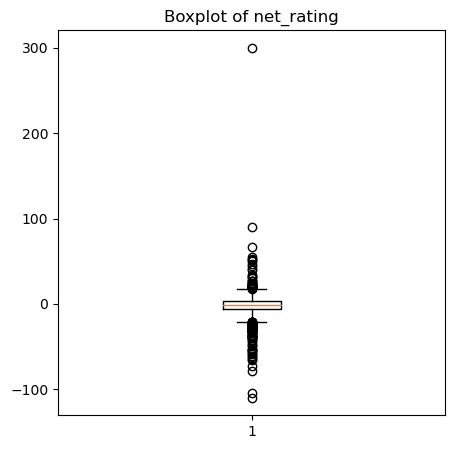

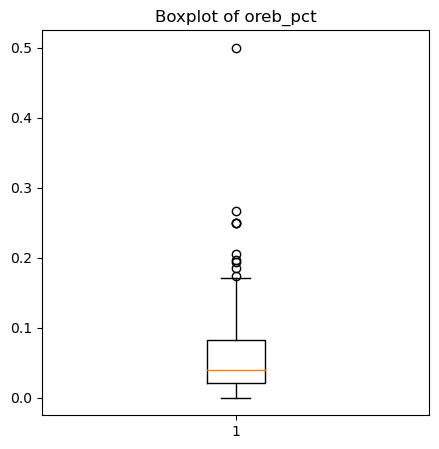

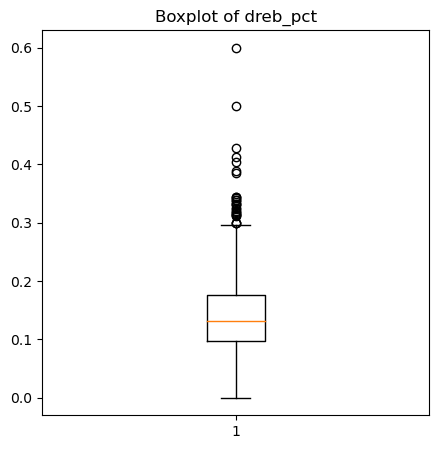

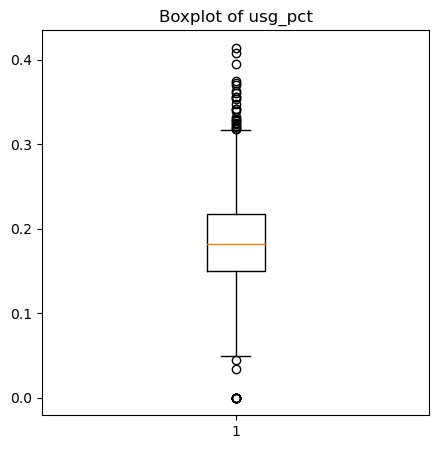

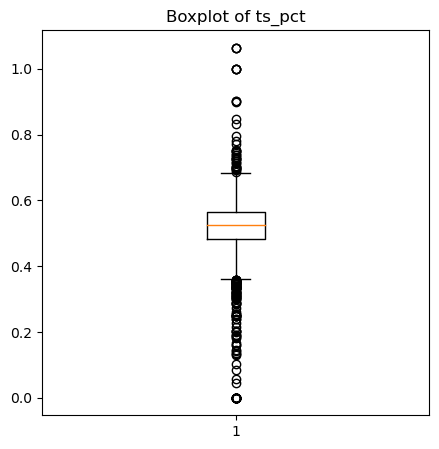

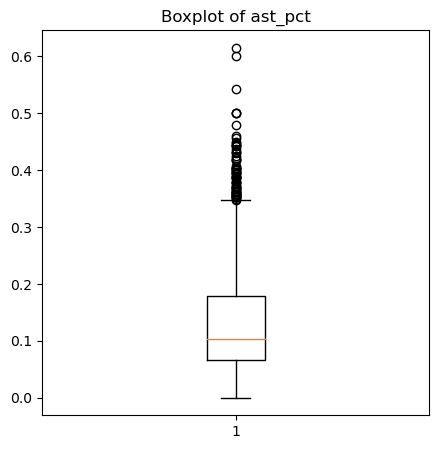

Data after outlier removal:         age  player_height  player_weight  gp  reb  ast  net_rating  oreb_pct  \
3570   22.0         198.12     102.058200  68  1.8  0.5       -10.9     0.069   
11539  28.0         195.58      97.522280   3  4.3  3.0        29.8     0.000   
9567   28.0         210.82     115.665960  74  5.4  1.9        -0.7     0.092   
10149  37.0         193.04      99.790240  72  4.0  4.2        -1.8     0.033   
777    32.0         208.28     111.130040  76  8.1  2.3        -1.5     0.093   
...     ...            ...            ...  ..  ...  ...         ...       ...   
11964  36.0         205.74     108.862080  69  7.7  3.4         9.3     0.054   
5191   31.0         210.82     113.398000  77  8.7  1.7        -0.7     0.145   
5390   28.0         200.66      96.161504  78  3.3  1.8         4.4     0.023   
860    27.0         203.20     103.418976  82  4.4  1.5        -3.3     0.115   
7270   27.0         185.42      81.646560  78  1.2  2.8        -8.4     0.014   


In [1269]:
def detect_and_plot_outliers(df):
    # Select only numeric columns
    df = df.select_dtypes(include=[np.number])

    z_scores = np.abs(stats.zscore(df))
    outliers = np.where(z_scores > 3)

    # Create a boxplot for each column to visualize the outliers
    for column in df.columns:
        plt.figure(figsize=(5, 5))
        plt.boxplot(df[column])
        plt.title(f'Boxplot of {column}')
        plt.show()

    # Remove outliers
    df = df[(z_scores < 3).all(axis=1)]

    return df

X_train = detect_and_plot_outliers(X_train)
X_test = detect_and_plot_outliers(X_test)
print(f"Data after outlier removal: {X_train}")
print(f"Data after outlier removal: {X_test}")


Correlation Analysis:

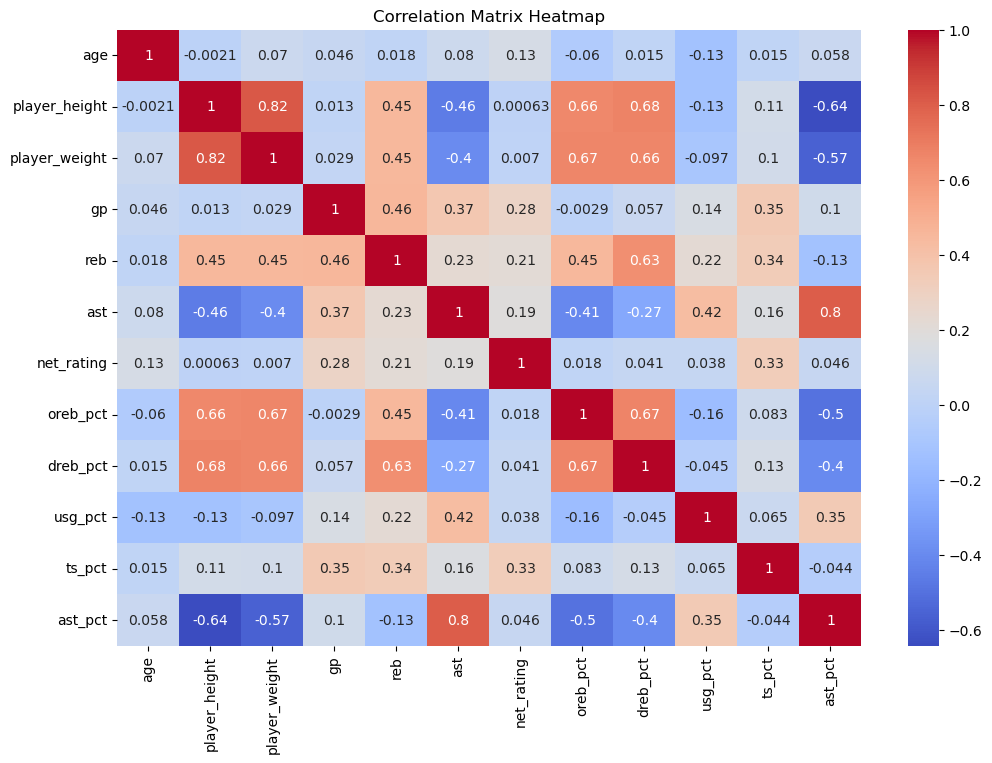

In [1270]:
def plot_corr_matrix(df):
    # Calculate the correlation matrix
    corr_matrix = df.corr()

    # Visualize the correlation matrix using a heatmap
    plt.figure(figsize=(12, 8))
    sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
    plt.title('Correlation Matrix Heatmap')
    plt.show()

plot_corr_matrix(X_train)

Standardization:

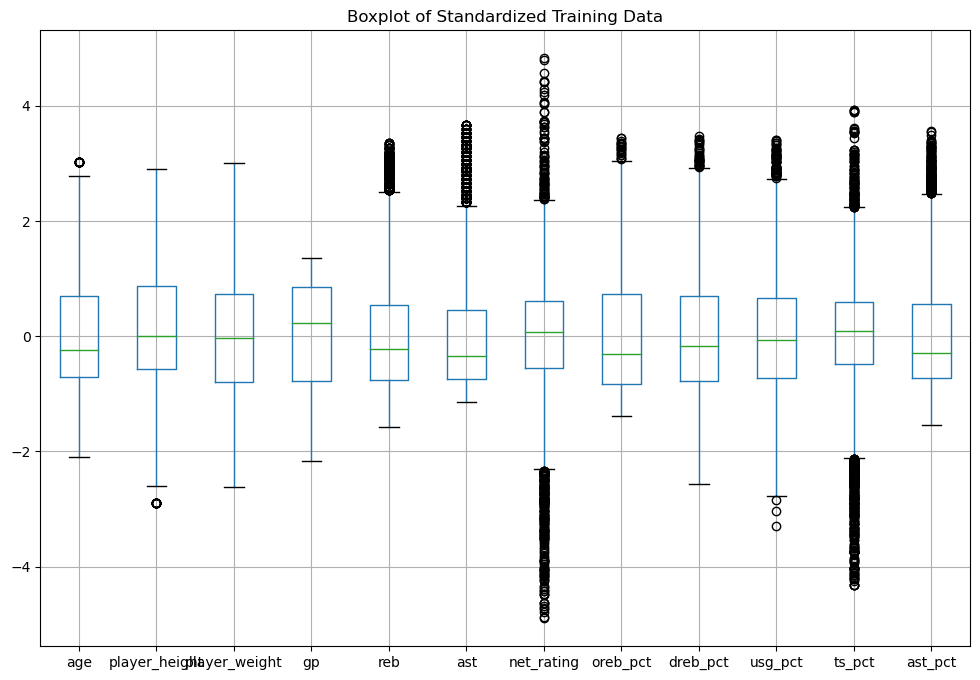

In [1271]:
def standardize_data(X_train, X_test):
    # Initialize the StandardScaler
    scaler = StandardScaler()

    # Fit on the training data
    scaler.fit(X_train)

    # Transform both the training and testing data
    X_train_std = scaler.transform(X_train)
    X_test_std = scaler.transform(X_test)

    # Convert the standardized data back to a DataFrame for easier visualization
    X_train_std_df = pd.DataFrame(X_train_std, columns=X_train.columns)
    X_test_std_df = pd.DataFrame(X_test_std, columns=X_test.columns)

    # Plot the standardized training data
    X_train_std_df.boxplot(figsize=(12, 8))
    plt.title('Boxplot of Standardized Training Data')
    plt.show()

    return X_train_std, X_test_std

X_train, X_test = standardize_data(X_train, X_test)

PCA: